In [1]:
import os
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import codecs
from os import path
import csv
import networkx as nx
import numpy as np
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from utils import get_raw_data, dump_prediction
from gensim.parsing.preprocessing import preprocess_documents
import unicodedata

In [2]:
train_data, test_data, y_train, G, train_hosts, tests_hosts  = get_raw_data(encoding='utf-8', errors="ignore")

100%|█████████████████████████████████████████████████████████████████████████████████| 560/560 [00:00<00:00, 560709.06it/s]


In [7]:
from tqdm import tqdm
distances = np.empty((len(train_hosts), len(tests_hosts)))
for cls_idx, cls_node in enumerate(tqdm(train_hosts)):
    for tes_idx, tes_node in enumerate(tests_hosts):
        try:
            distances[cls_idx, tes_idx] = nx.shortest_path_length(
                G, source=cls_node, target=tes_node)
        except nx.NetworkXNoPath:
            distances[cls_idx, tes_idx] = np.inf

100%|███████████████████████████████████████████████████████████████████████████████████| 2125/2125 [01:35<00:00, 22.21it/s]


In [13]:
undirected_G = G.to_undirected()
distances_undirected = np.empty((len(train_hosts), len(tests_hosts)))
for cls_idx, cls_node in enumerate(tqdm(train_hosts)):
    for tes_idx, tes_node in enumerate(tests_hosts):
        distances_undirected[cls_idx, tes_idx] = nx.shortest_path_length(
            undirected_G, source=cls_node, target=tes_node)

100%|███████████████████████████████████████████████████████████████████████████████████| 2125/2125 [03:19<00:00, 10.68it/s]


In [8]:
distances

array([[inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [ 2.,  3.,  2., ...,  2.,  2.,  3.]])

In [18]:
np.min(distances_undirected, axis=1)

array([1., 2., 1., ..., 1., 1., 1.])

In [16]:
distances_undirected.shape

(2125, 560)

In [19]:
len(G.nodes())

28002

In [27]:
from collections import Counter
Counter(y_train)

Counter({'health/medical': 92,
         'entertainment': 579,
         'education/research': 209,
         'tech/science': 290,
         'politics/government/law': 200,
         'news/press': 83,
         'sports': 46,
         'business/finance': 626})

(array([6.50770e+05, 1.65900e+03, 3.84120e+04, 2.92483e+05, 1.10493e+05,
        5.75960e+04, 3.30080e+04, 4.15800e+03, 9.95000e+02, 4.26000e+02]),
 array([-1. ,  0.3,  1.6,  2.9,  4.2,  5.5,  6.8,  8.1,  9.4, 10.7, 12. ]),
 <a list of 10 Patch objects>)

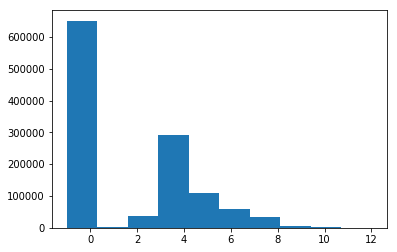

In [25]:
import matplotlib.pyplot as plt
distances[distances==np.inf] = -1
plt.hist(distances.ravel())

(array([3.93700e+03, 3.55873e+05, 0.00000e+00, 6.99099e+05, 0.00000e+00,
        1.26625e+05, 4.30400e+03, 0.00000e+00, 1.59000e+02, 3.00000e+00]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

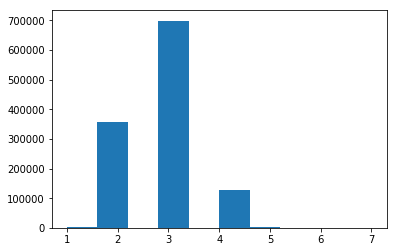

In [26]:
import matplotlib.pyplot as plt
distances_undirected[distances_undirected==np.inf] = -1
plt.hist(distances_undirected.ravel())